## Cat vs Dog Prediction using Convnets

The two interesting properties of using convnets are:


*   The patterns that convnets learn are invariant. After learning a certain pattern in the lower right corner of a picture, a convnet can recognize it anywhere. A densely connected network would have to learn the pattern anew if it appeared at a new location.
*   They can learn spatial hierarchies of patterns. A first convolution layer will learn small local patterns such as edges, a second convolution layer will lwarn larger patterns made of the features of the first layer, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts.

In this section we'll focus on classifying images as dogs or cats, in dataset containing 4,000 pictures of cats and dogs, we,ll use 2,000 pictures for training- 1,000 for validation and 1,000 for testing. The actual dataset contains even more examples but we won't use all of them to approach the challenge of finding key insights from a smaller dataset as most of the datasets available in real world are small.

The dataset for this example is available [here](www.kaggle.com/c/dogs-vs-cats/data)



# New Section

In [0]:
# Running this cell will provide you with a token to link your drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#After uploading the zip file to your drive mount the drive and unzip it it is always preferable to unzip the file 
#after uploading because it takes relatively lesser time overall and also prevents any data leakage.

# Use the '-d' parameter as the destination for where the files should go
#!unzip "drive/My Drive/CatsNdDogs/train.zip" -d "drive/My Drive/Data/"

In [0]:
import os
import shutil

In [0]:
%cd drive/My Drive

/content/drive/My Drive


In [0]:
print('Total training cat images:', len(os.listdir('Data/CatsNdDogsSmall/train_dir/train_cats_dir')))
print('Total training dog images:', len(os.listdir('Data/CatsNdDogsSmall/train_dir/train_dogs_dir')))
print('Total validation dog images:', len(os.listdir('Data/CatsNdDogsSmall/validation_dir/validation_dogs_dir')))
print('Total validation cat images:', len(os.listdir('Data/CatsNdDogsSmall/validation_dir/validation_cats_dir')))
print('Total test cat images:', len(os.listdir('Data/CatsNdDogsSmall/test_dir/test_cats_dir')))
print('Total test dog images:', len(os.listdir('Data/CatsNdDogsSmall/test_dir/test_dogs_dir')))

Total training cat images: 1000
Total training dog images: 1000
Total validation dog images: 500
Total validation cat images: 500
Total test cat images: 500
Total test dog images: 500


## Building a convnet:
Following is a basic Convolution neuralnet consisting of 4 conv2d layers and 4 Maxpooling layers.

Because you're taking a binary-classification problem, you'll end the network with a single unit and a sigmoid activation.

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [0]:
model = models.Sequential()

In [0]:
model.add(layers.Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras import optimizers

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing:
As you know data should be processed appropriately before feeding it to a network this is one of the most important step to have better optimization. The steps for getting these images from drive to network are as follows:


*   Read the picture file.

*   Decode the JPEG content to RGB grids of pixels.
*   Convert these into floating-point tensors.


*   Rescale the pixel values (between 0 and 255) to the [0,1] interval (as you know, neural networks prefer to deal with small input values).

keraas.preprocessing.image contains the class ImageDataGenerator, which lets you quickly setup Python generators that can automatically run image files on disk into batches of preprocessed tensors.



In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./225)
test_datagen = ImageDataGenerator(rescale=1./225)

In [0]:
train_generator = train_datagen.flow_from_directory(
    directory=r'Data/CatsNdDogsSmall/train_dir',
    target_size=(150, 150),
    batch_size = 20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    directory=r'Data/CatsNdDogsSmall/validation_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 1027s 10s/step - loss: 0.6905 - acc: 0.5265 - val_loss: 0.7029 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6562 - acc: 0.6155 - val_loss: 0.6393 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6090 - acc: 0.6640 - val_loss: 0.6097 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5585 - acc: 0.7145 - val_loss: 0.6006 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5278 - acc: 0.7300 - val_loss: 0.5804 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4963 - acc: 0.7635 - val_loss: 0.5769 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 11s 115ms/step - loss: 0.4788 - acc: 0.7680 - val_loss: 0.61

In [0]:

import matplotlib.pyplot as plt

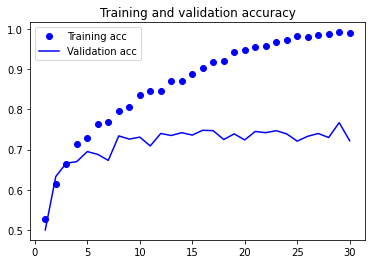

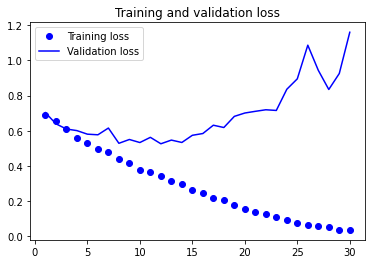

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time until its reaches its maximum, whereas thhe validation accuracy stalls at 70-72%.
Because we have relatively few training samples overfitting will be our main concern. There are number of ways to prevent overfitting like using regularizers. We're now going to use a new one, specific to computer vision and used almost universally when processing images with deep learning models: *data augmentation*.

## Data Augmentation:
Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting, the samples via a number of random transformations that yield believable-looking images. The goal is that at training time your model will never see the exact same picture twice. This helps expose the model to more aspects of data and generalize better.

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

In [0]:
from tensorflow.keras.preprocessing import image

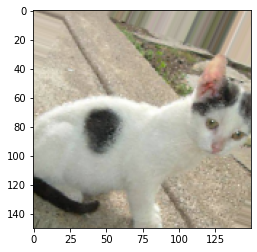

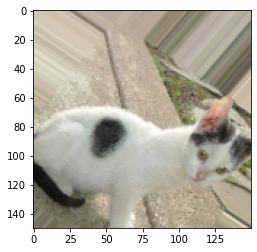

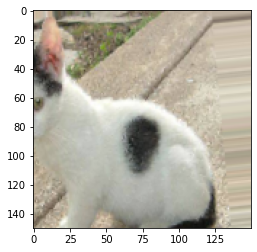

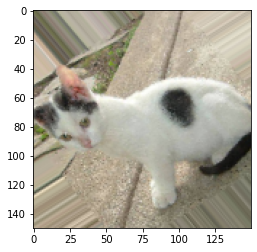

In [0]:
import matplotlib.pyplot as plt
fnames = [os.path.join('Data/CatsNdDogsSmall/train_dir/train_cats_dir', fname) for fname in os.listdir('Data/CatsNdDogsSmall/train_dir/train_cats_dir')]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i% 4 == 0:
    break

plt.show()

In [0]:
model = models.Sequential()

In [0]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
validation_generator = test_datagen.flow_from_directory(
    'Data/CatsNdDogsSmall/validation_dir',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [0]:
train_generator = train_datagen.flow_from_directory(
    'Data/CatsNdDogsSmall/train_dir',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 31s 309ms/step - loss: 0.6928 - acc: 0.5236 - val_loss: 0.6943 - val_acc: 0.4956
Epoch 2/100
100/100 [==============================] - 30s 305ms/step - loss: 0.6748 - acc: 0.5723 - val_loss: 0.6633 - val_acc: 0.5773
Epoch 3/100
100/100 [==============================] - 30s 305ms/step - loss: 0.6686 - acc: 0.5776 - val_loss: 0.7198 - val_acc: 0.5121
Epoch 4/100
100/100 [==============================] - 30s 305ms/step - loss: 0.6586 - acc: 0.6073 - val_loss: 0.6285 - val_acc: 0.6269
Epoch 5/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6403 - acc: 0.6215 - val_loss: 0.6060 - val_acc: 0.6656
Epoch 6/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6172 - acc: 0.6490 - val_loss: 0.6244 - val_acc: 0.6353
Epoch 7/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6077 - acc: 0.6758 - val_loss: 0.5712 - val_acc: 0.6939
Epoch 8/100
100/100 [===========================

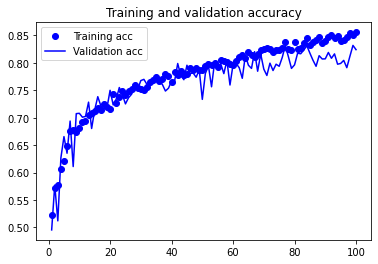

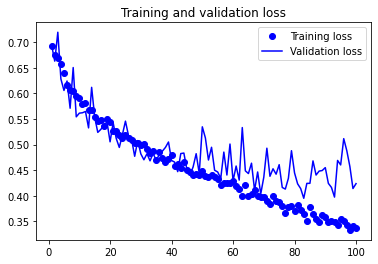

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using a pretrained convnet:
A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computer vision problems.
For this example you'll use VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014; its a simple and widely used convnet zrchitecture for ImageNet.


In [0]:
from tensorflow.keras.applications import VGG16

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
model = models.Sequential()

In [0]:
model.add(conv_base)

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable=False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
model.compile(loss= 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 31s 313ms/step - loss: 0.5998 - acc: 0.6793 - val_loss: 0.4350 - val_acc: 0.8433
Epoch 2/30
100/100 [==============================] - 32s 317ms/step - loss: 0.4635 - acc: 0.7974 - val_loss: 0.3674 - val_acc: 0.8621
Epoch 3/30
100/100 [==============================] - 31s 308ms/step - loss: 0.4166 - acc: 0.8084 - val_loss: 0.3307 - val_acc: 0.8653
Epoch 4/30
100/100 [==============================] - 31s 311ms/step - loss: 0.3920 - acc: 0.8217 - val_loss: 0.2951 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 31s 312ms/step - loss: 0.3638 - acc: 0.8417 - val_loss: 0.3027 - val_acc: 0.8634
Epoch 6/30
100/100 [==============================] - 31s 311ms/step - loss: 0.3552 - acc: 0.8419 - val_loss: 0.2722 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 32s 315ms/step - loss: 0.3442 - acc: 0.8524 - val_loss: 0.2652 - val_acc: 0.8924
Epoch 8/30
100/100 [==============================] - 3

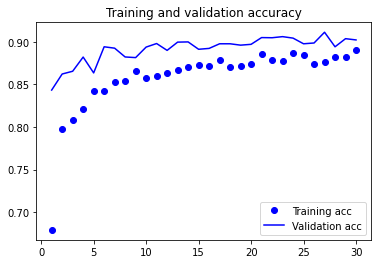

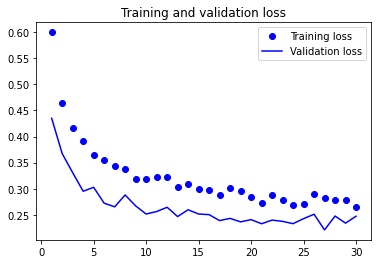

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainable=True

In [0]:
set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 32s 318ms/step - loss: 0.2850 - acc: 0.8763 - val_loss: 0.2024 - val_acc: 0.9124
Epoch 2/100
100/100 [==============================] - 32s 320ms/step - loss: 0.2269 - acc: 0.9034 - val_loss: 0.2254 - val_acc: 0.9137
Epoch 3/100
100/100 [==============================] - 32s 316ms/step - loss: 0.2183 - acc: 0.9050 - val_loss: 0.1903 - val_acc: 0.9251
Epoch 4/100
100/100 [==============================] - 32s 316ms/step - loss: 0.2015 - acc: 0.9143 - val_loss: 0.1899 - val_acc: 0.9227
Epoch 5/100
100/100 [==============================] - 32s 316ms/step - loss: 0.1881 - acc: 0.9220 - val_loss: 0.1893 - val_acc: 0.9227
Epoch 6/100
100/100 [==============================] - 32s 320ms/step - loss: 0.1732 - acc: 0.9300 - val_loss: 0.2160 - val_acc: 0.9213
Epoch 7/100
100/100 [==============================] - 31s 315ms/step - loss: 0.1485 - acc: 0.9429 - val_loss: 0.1965 - val_acc: 0.9278
Epoch 8/100
100/100 [===========================

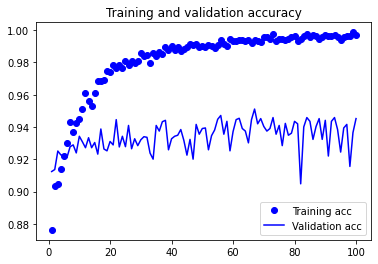

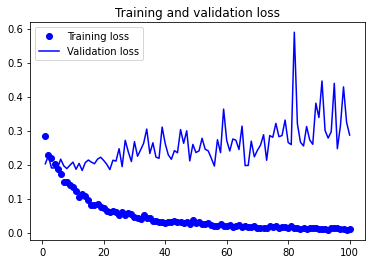

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    'Data/CatsNdDogsSmall/test_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [0]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=50)
print('test accuracy:', test_accuracy)

50/50 [==============================] - 339s 7s/step - loss: 0.3735 - acc: 0.9390
test accuracy: 0.9390000104904175
